In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "ProjectCustomerSegmentationData.xlsx"
df0 = pd.read_excel(file_path)

print(df0.head())

   CustomerID  Age  Gender  Annual_Income  Spending_Score  Online_Purchases  \
0           1   56    Male          65648               5                 9   
1           2   69    Male         123537              84                 0   
2           3   46    Male         145991              65                12   
3           4   32  Female          29516              30                16   
4           5   60    Male         132863              21                 2   

   Loyalty_Card  Seniority  
0         False          4  
1          True          8  
2          True         13  
3          True         13  
4         False         17  


In [457]:
#Ce que l'on va faire c'est diviser les données en hommes et fememes et faire 2 études différentes
# De plus, on divisera chaque groupe par carte de fidelité ou pas aussi, en tout cela peut amener à une autre analyse

In [23]:
#Retirons d'abord le customer ID pour faire notre analyse pour la suite
df = df0.drop(columns = "CustomerID")

In [24]:
df_female = df[df['Gender']=='Female']
df_male = df[df['Gender']== 'Male']

In [25]:
print(df_female.head())

    Age  Gender  Annual_Income  Spending_Score  Online_Purchases  \
3    32  Female          29516              30                16   
7    56  Female         104082              22                 2   
8    36  Female          39129              82                15   
13   53  Female          91719              76                 5   
14   57  Female         138618              38                16   

    Loyalty_Card  Seniority  
3           True         13  
7           True          6  
8          False         19  
13          True          8  
14          True         13  


In [26]:
print(df_male.head())

   Age Gender  Annual_Income  Spending_Score  Online_Purchases  Loyalty_Card  \
0   56   Male          65648               5                 9         False   
1   69   Male         123537              84                 0          True   
2   46   Male         145991              65                12          True   
4   60   Male         132863              21                 2         False   
5   25   Male         135005              84                 7          True   

   Seniority  
0          4  
1          8  
2         13  
4         17  
5         17  


In [27]:
print("There is some information about data")
print(df0.info())
print("There is a describe about data")
print(df0.describe())


There is some information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Annual_Income     1000 non-null   int64 
 4   Spending_Score    1000 non-null   int64 
 5   Online_Purchases  1000 non-null   int64 
 6   Loyalty_Card      1000 non-null   bool  
 7   Seniority         1000 non-null   int64 
dtypes: bool(1), int64(6), object(1)
memory usage: 55.8+ KB
None
There is a describe about data
        CustomerID         Age  Annual_Income  Spending_Score  \
count  1000.000000  1000.00000    1000.000000      1000.00000   
mean    500.500000    43.81900   87130.677000        48.82600   
std     288.819436    14.99103   38333.193443        29.12181   
min       1.000000    18.00000   20207.000

In [28]:
print("There is a test for see null")
print(df0.isnull())

There is a test for see null
     CustomerID    Age  Gender  Annual_Income  Spending_Score  \
0         False  False   False          False           False   
1         False  False   False          False           False   
2         False  False   False          False           False   
3         False  False   False          False           False   
4         False  False   False          False           False   
..          ...    ...     ...            ...             ...   
995       False  False   False          False           False   
996       False  False   False          False           False   
997       False  False   False          False           False   
998       False  False   False          False           False   
999       False  False   False          False           False   

     Online_Purchases  Loyalty_Card  Seniority  
0               False         False      False  
1               False         False      False  
2               False         False      Fa

In [43]:
#On va aussi couper chaque echantillon de male ou femelle en 2 , ceux qui ont une carte avec ceux qui n'ont pas
df_female_abo = df_female[df_female["Loyalty_Card"]==True]
df_female_desabo = df_female[df_female["Loyalty_Card"] == False]
df_male_abo = df_male[df_male["Loyalty_Card"]==True]
df_male_desabo = df_male[df_male["Loyalty_Card"] == False]



In [44]:
#Considérons que les colonnes numériques, donc on retire Gender et loyalty card de chaque groupe
columns_to_drop = ["Gender","Loyalty_Card"]
df_female_abo_numeric = df_female_abo.drop(columns=columns_to_drop)

In [46]:
df_female_desabo_numeric = df_female_desabo.drop(columns=columns_to_drop)

In [47]:
df_male_abo_numeric = df_male_abo.drop(columns=columns_to_drop)


In [48]:
df_male_desabo_numeric = df_male_desabo.drop(columns=columns_to_drop)


In [49]:
print(df_male_desabo_numeric.head())

    Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
0    56          65648               5                 9          4
4    60         132863              21                 2         17
11   28          31303              33                16          4
12   41          50561              16                12          7
17   39         119616              36                 7          3


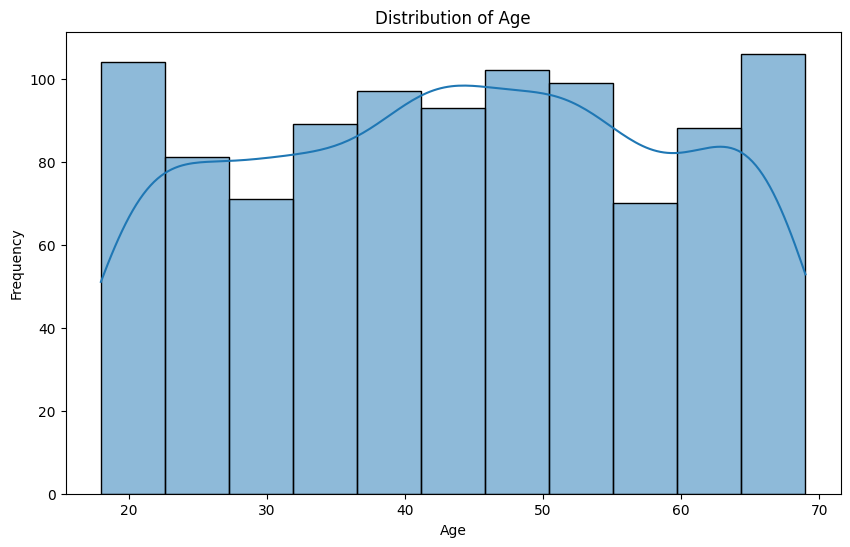

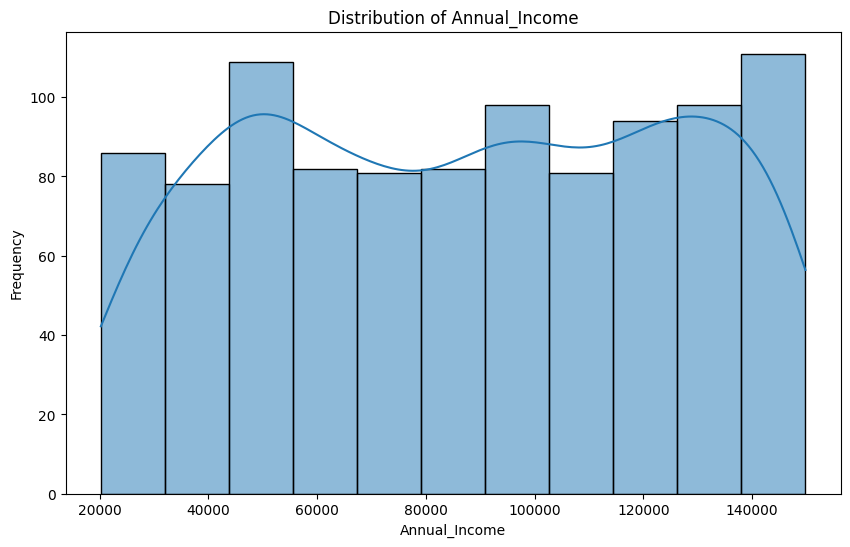

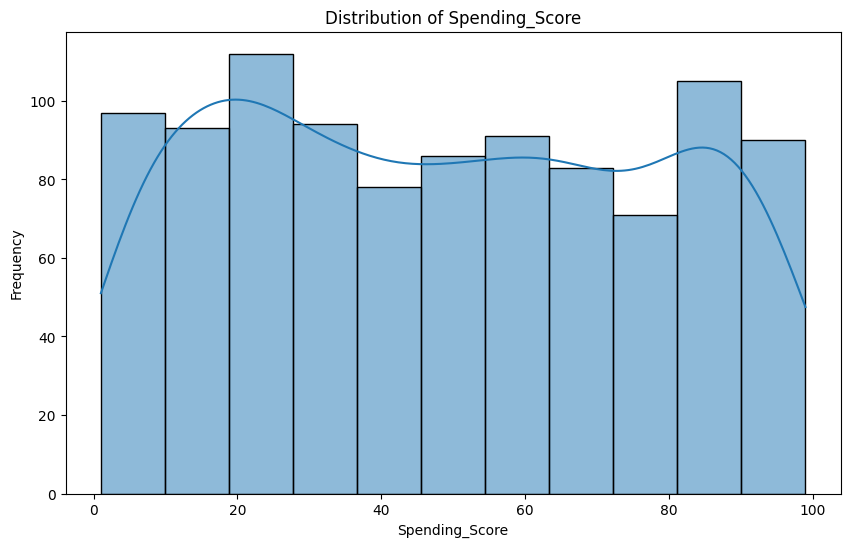

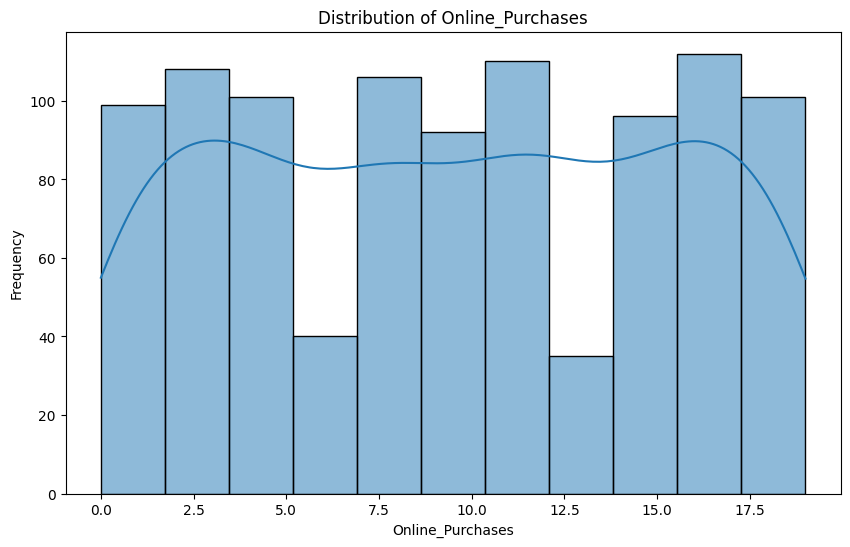

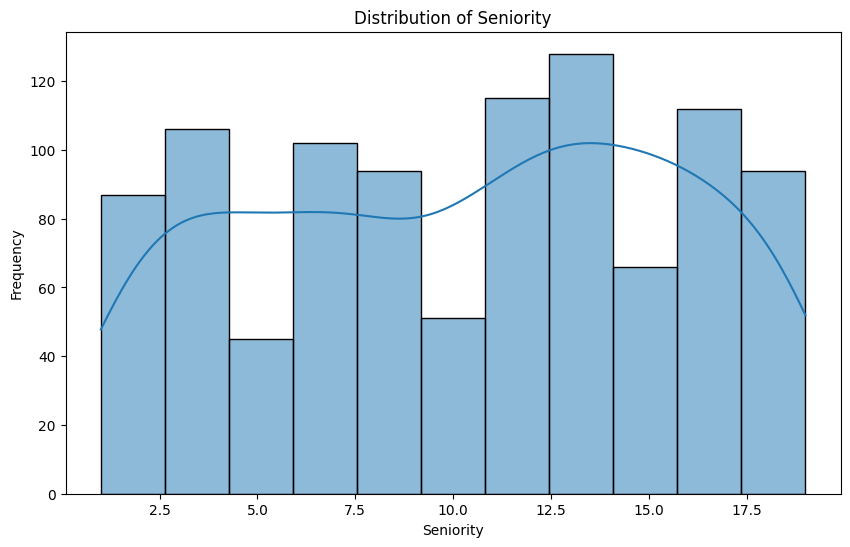

In [51]:
#Cette boucle fait un histogramme des colonnes numériques donc on a la distribution de chaque variable numérique
for col in df_male_abo_numeric : 
    plt.figure(figsize = (10,6))
    sns.histplot(df[col], kde =True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Les hommes qui sont abonnés


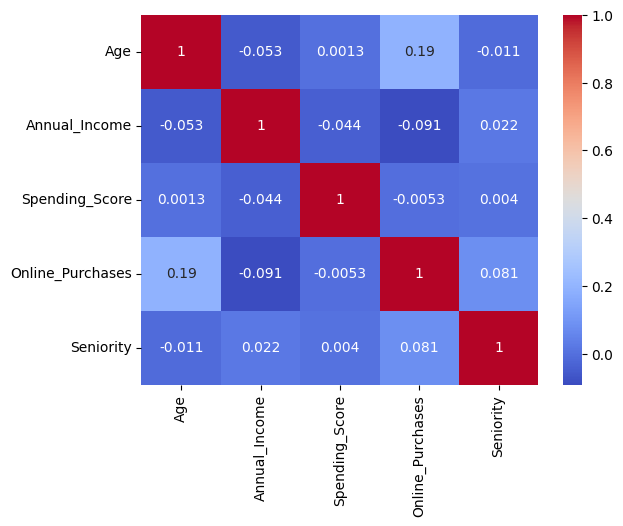

              Age  Annual_Income  Spending_Score  Online_Purchases   Seniority
count  250.000000     250.000000      250.000000        250.000000  250.000000
mean    43.284000   85277.024000       49.740000          9.060000   10.292000
std     14.421486   38205.335897       29.409046          5.856414    5.383928
min     18.000000   20619.000000        1.000000          0.000000    1.000000
25%     31.000000   51910.000000       23.000000          4.000000    5.250000
50%     43.000000   85278.500000       51.500000          9.000000   11.000000
75%     54.000000  120268.000000       74.750000         14.000000   15.000000
max     69.000000  149749.000000       99.000000         19.000000   19.000000


In [61]:
#Cette fonction prend une matrice de correlation entre toutes les variables numériques
print("Les hommes qui sont abonnés")
corr_matrix_male_abo = df_male_abo_numeric.corr()
#la fonction heatmap donne un tableau avec différentes couleurs en fonction de leur degré de corrélation
sns.heatmap(corr_matrix_male_abo, annot=True , cmap= 'coolwarm')
plt.show()
print(df_male_abo_numeric.describe())

Les hommes qui sont desabonnés


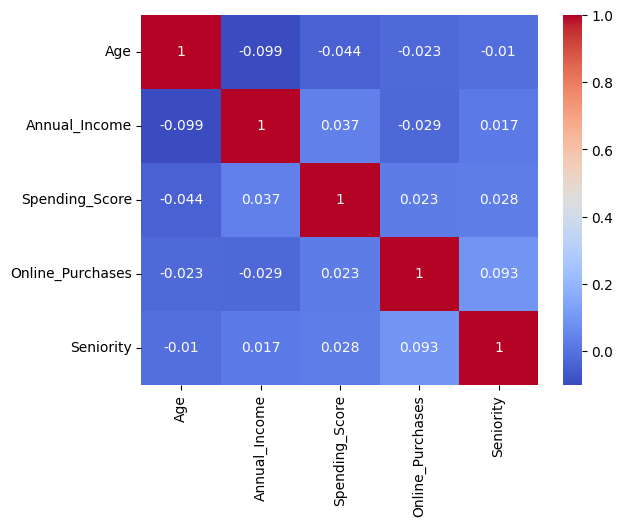

              Age  Annual_Income  Spending_Score  Online_Purchases   Seniority
count  274.000000     274.000000      274.000000        274.000000  274.000000
mean    44.580292   90604.540146       47.627737          9.883212   10.138686
std     15.243894   39013.545301       29.356470          5.781828    5.175573
min     18.000000   20207.000000        1.000000          0.000000    1.000000
25%     32.000000   55110.500000       22.000000          5.000000    6.000000
50%     44.000000   92946.000000       47.000000         10.000000   10.500000
75%     57.750000  126178.500000       74.500000         15.000000   14.000000
max     69.000000  149582.000000       99.000000         19.000000   19.000000


In [62]:
#Cette fonction prend une matrice de correlation entre toutes les variables numériques
print('Les hommes qui sont desabonnés')
corr_matrix_male_desabo = df_male_desabo_numeric.corr()
#la fonction heatmap donne un tableau avec différentes couleurs en fonction de leur degré de corrélation
sns.heatmap(corr_matrix_male_desabo, annot=True , cmap= 'coolwarm')
plt.show()
print(df_male_desabo_numeric.describe())

Les femmes qui sont desabonnés


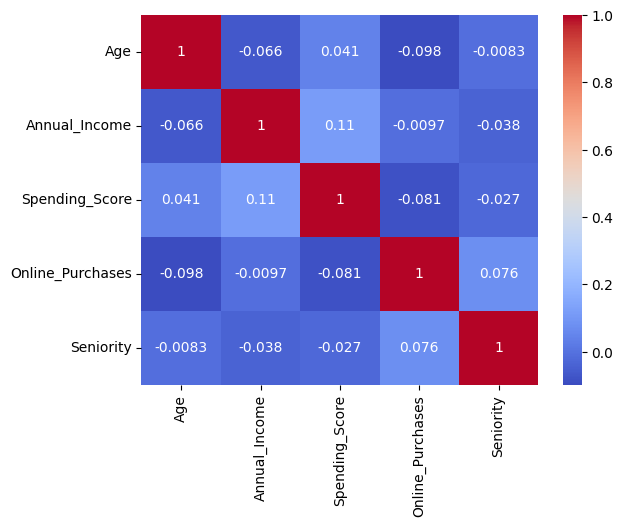

              Age  Annual_Income  Spending_Score  Online_Purchases   Seniority
count  252.000000     252.000000      252.000000        252.000000  252.000000
mean    44.956349   87836.452381       48.230159          9.674603   10.658730
std     14.795892   36342.213231       28.323308          5.977820    5.421901
min     18.000000   20526.000000        1.000000          0.000000    1.000000
25%     32.750000   56904.750000       26.000000          4.000000    6.000000
50%     46.500000   91672.500000       47.500000         10.000000   11.000000
75%     57.000000  118595.500000       70.250000         15.000000   16.000000
max     69.000000  149824.000000       99.000000         19.000000   19.000000


In [63]:
#Cette fonction prend une matrice de correlation entre toutes les variables numériques
print("Les femmes qui sont desabonnés")
corr_matrix_female_desabo = df_female_desabo_numeric.corr()
#la fonction heatmap donne un tableau avec différentes couleurs en fonction de leur degré de corrélation
sns.heatmap(corr_matrix_female_desabo, annot=True , cmap= 'coolwarm')
plt.show()
print(df_female_desabo_numeric.describe())

Les femmes qui sont abonnés


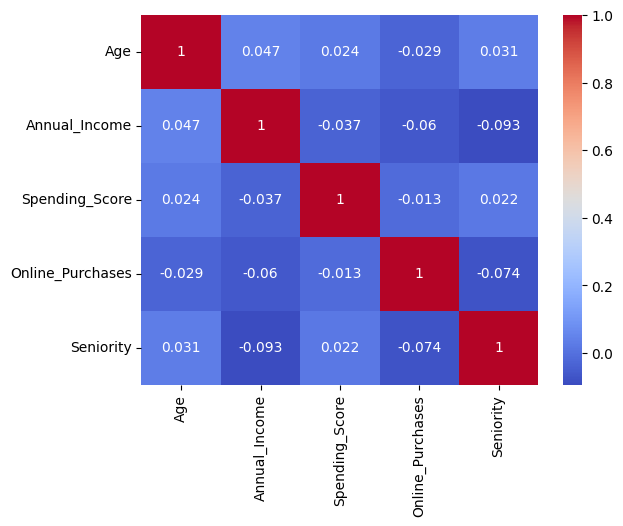

              Age  Annual_Income  Spending_Score  Online_Purchases   Seniority
count  252.000000     252.000000      252.000000        252.000000  252.000000
mean    44.956349   87836.452381       48.230159          9.674603   10.658730
std     14.795892   36342.213231       28.323308          5.977820    5.421901
min     18.000000   20526.000000        1.000000          0.000000    1.000000
25%     32.750000   56904.750000       26.000000          4.000000    6.000000
50%     46.500000   91672.500000       47.500000         10.000000   11.000000
75%     57.000000  118595.500000       70.250000         15.000000   16.000000
max     69.000000  149824.000000       99.000000         19.000000   19.000000


In [64]:

#Cette fonction prend une matrice de correlation entre toutes les variables numériques
print("Les femmes qui sont abonnés")
corr_matrix_female_abo = df_female_abo_numeric.corr()
#la fonction heatmap donne un tableau avec différentes couleurs en fonction de leur degré de corrélation
sns.heatmap(corr_matrix_female_abo, annot=True , cmap= 'coolwarm')
plt.show()
print(df_female_abo_numeric.describe())

In [65]:
import scipy.stats as stats
#Avant de pouvoir voir la correlation entre Male/Femelle et les autres variables nuémriques, nous devons d'abord savoir si la distribution de nos valeurs peuvent être considéré comme une loi normale.
#Pour cela, nous utilisons le test de Shapiro.
test_shapiro = stats.shapiro(df_female_abo_numeric)
print(test_shapiro)

if test_shapiro.pvalue < 0.05 : 
    print("La distribution des valeurs numériques ne suit pas une distribution normale")
else : 
    print("La distribution des valeurs numériques peuvent être considérés comme une distribution normale")

ShapiroResult(statistic=0.513441082132527, pvalue=4.067465592469465e-50)
La distribution des valeurs numériques ne suit pas une distribution normale


In [66]:
import scipy.stats as stats
#Avant de pouvoir voir la correlation entre Male/Femelle et les autres variables nuémriques, nous devons d'abord savoir si la distribution de nos valeurs peuvent être considéré comme une loi normale.
#Pour cela, nous utilisons le test de Shapiro.
test_shapiro = stats.shapiro(df_female_desabo_numeric)
print(test_shapiro)

if test_shapiro.pvalue < 0.05 : 
    print("La distribution des valeurs numériques ne suit pas une distribution normale")
else : 
    print("La distribution des valeurs numériques peuvent être considérés comme une distribution normale")

ShapiroResult(statistic=0.5044767357516059, pvalue=2.985495791786882e-48)
La distribution des valeurs numériques ne suit pas une distribution normale


In [67]:
import scipy.stats as stats
#Avant de pouvoir voir la correlation entre Male/Femelle et les autres variables nuémriques, nous devons d'abord savoir si la distribution de nos valeurs peuvent être considéré comme une loi normale.
#Pour cela, nous utilisons le test de Shapiro.
test_shapiro = stats.shapiro(df_male_abo_numeric)
print(test_shapiro)

if test_shapiro.pvalue < 0.05 : 
    print("La distribution des valeurs numériques ne suit pas une distribution normale")
else : 
    print("La distribution des valeurs numériques peuvent être considérés comme une distribution normale")

ShapiroResult(statistic=0.5076908449048501, pvalue=3.6893430821705457e-50)
La distribution des valeurs numériques ne suit pas une distribution normale


In [68]:
import scipy.stats as stats
#Avant de pouvoir voir la correlation entre Male/Femelle et les autres variables nuémriques, nous devons d'abord savoir si la distribution de nos valeurs peuvent être considéré comme une loi normale.
#Pour cela, nous utilisons le test de Shapiro.
test_shapiro = stats.shapiro(df_male_desabo_numeric)
print(test_shapiro)

if test_shapiro.pvalue < 0.05 : 
    print("La distribution des valeurs numériques ne suit pas une distribution normale")
else : 
    print("La distribution des valeurs numériques peuvent être considérés comme une distribution normale")

ShapiroResult(statistic=0.5080153575440507, pvalue=7.239510992462367e-52)
La distribution des valeurs numériques ne suit pas une distribution normale


In [71]:
from sklearn.preprocessing import StandardScaler

columns=["Age","Annual_Income","Spending_Score","Online_Purchases","Seniority"]
# Normalisation des données
scaler = StandardScaler()
df_female_abo_numeric_transform = scaler.fit_transform(df_female_abo_numeric[columns])
# Convertir en DataFrame pour analyse ultérieure
df_female_abo_numeric_scaled = pd.DataFrame(df_female_abo_numeric_transform, columns=columns)
print(df_female_abo_numeric_scaled.head())


        Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
0 -0.877415      -1.607951       -0.644926          1.060250   0.432676
1  0.747885       0.447905       -0.927941         -1.286401  -0.860953
2  0.544723       0.107046        0.982410         -0.783547  -0.491344
3  0.815606       1.400096       -0.361911          1.060250   0.432676
4  0.680164      -1.329292       -1.635478          1.060250  -0.860953


In [72]:

# Normalisation des données
scaler = StandardScaler()
df_female_desabo_numeric_transform = scaler.fit_transform(df_female_desabo_numeric[columns])
# Convertir en DataFrame pour analyse ultérieure
df_female_desabo_numeric_scaled = pd.DataFrame(df_female_desabo_numeric_transform, columns=columns)
print(df_female_desabo_numeric_scaled.head())

        Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
0 -0.402685      -1.137148        1.088557          1.026100   1.643765
1 -0.078219       0.705914        1.631850          0.663280  -0.774954
2 -1.440975       1.631245       -1.220439          1.207510  -0.774954
3  1.219643      -1.435532        0.545264         -1.695049  -1.519175
4 -1.505868       0.088866        1.394159         -0.062360  -0.402843


In [73]:

# Normalisation des données
scaler = StandardScaler()
df_male_abo_numeric_transform = scaler.fit_transform(df_male_abo_numeric[columns])
# Convertir en DataFrame pour analyse ultérieure
df_male_abo_numeric_scaled = pd.DataFrame(df_male_abo_numeric_transform, columns=columns)
print(df_male_abo_numeric_scaled.head())

        Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
0  1.786750       1.003439        1.167285         -1.550125  -0.426565
1  0.188708       1.592337        0.519929          0.503021   0.503987
2 -1.270374       1.304209        1.167285         -0.352457   1.248430
3 -0.367133      -1.649172        0.690286          0.674116  -0.984897
4 -0.228173       1.653472        0.758428          0.503021   0.503987


In [74]:
# Normalisation des données
scaler = StandardScaler()
df_male_desabo_numeric_transform = scaler.fit_transform(df_male_desabo_numeric[columns])
# Convertir en DataFrame pour analyse ultérieure
df_male_desabo_numeric_scaled = pd.DataFrame(df_male_desabo_numeric_transform, columns=columns)
print(df_male_desabo_numeric_scaled.head())

        Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
0  0.750504      -0.640860       -1.454730         -0.153036  -1.188259
1  1.013384       1.085156       -0.908708         -1.365941   1.328137
2 -1.089658      -1.522806       -0.499192          1.059869  -1.188259
3 -0.235297      -1.028279       -1.079340          0.366780  -0.607552
4 -0.366737       0.744986       -0.396812         -0.499580  -1.381827


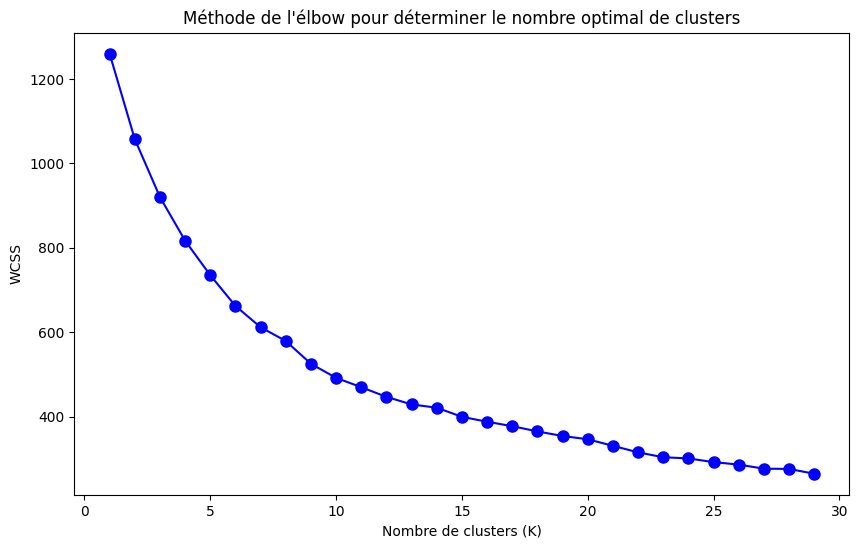

In [75]:
#Avant de pouvoir utiliser la méthode des clusters K-means, nous avons besoin de savoir à l'avance le nombre de clusters que l'on va appliquer
#Pour cela, nous utilisons la méthode ELbow
#On prend le K qui permet d'avoir le coude (la courbe en bas à gauche)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que df_scaled est le DataFrame normalisé

# Liste pour stocker les WCSS pour chaque valeur de K
wcss = []

# Calcul de WCSS pour différentes valeurs de K
K_values = range(1, 30)
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_female_abo_numeric_scaled)
    wcss.append(kmeans.inertia_)

# Tracer le graphe de l'élbow
plt.figure(figsize=(10, 6))
plt.plot(K_values, wcss, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('WCSS')
plt.title('Méthode de l\'élbow pour déterminer le nombre optimal de clusters')
plt.show()


In [80]:
print("Le K est 8 ou 2/3")

Le K est 8 ou 2/3


In [96]:
def optimise_k_means(data,max_k) : 
    means=[]
    inertias=[]

    for k in range(1, max_k) : 
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

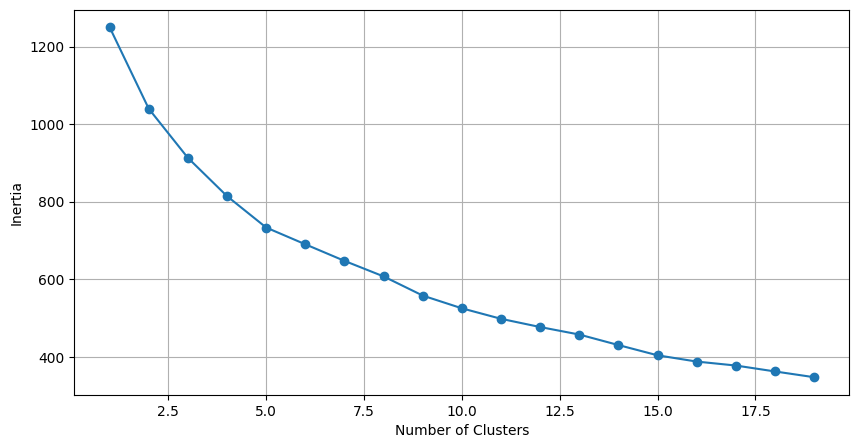

In [100]:
optimise_k_means(df_female_abo_numeric_scaled,20)

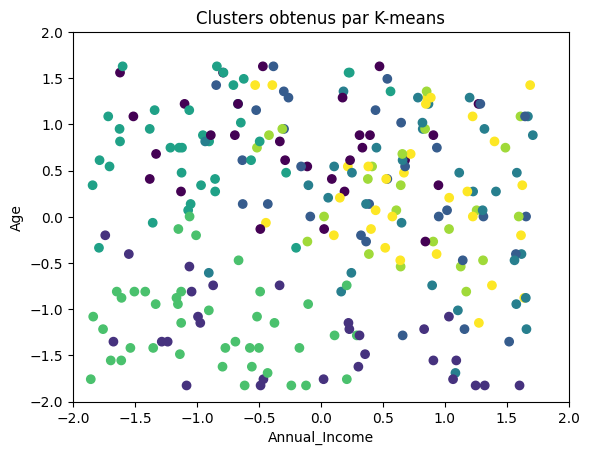

In [109]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 8
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(df_female_abo_numeric_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
df_female_abo_numeric['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(df_female_abo_numeric, pd.DataFrame):
    plt.scatter(df_female_abo_numeric_scaled.iloc[:, 1], df_female_abo_numeric_scaled.iloc[:, 0], c=labels)
else:
    plt.scatter(df_female_abo_numeric_scaled[:, 1], df_female_abo_numeric_scaled[:, 0], c=labels)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Clusters obtenus par K-means')
plt.xlabel('Annual_Income')
plt.ylabel('Age')
plt.show()

In [110]:
cluster_profile_female_abo =df_female_abo_numeric.groupby('Cluster').mean()
print(cluster_profile_female_abo)

               Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
Cluster                                                                       
0        56.482759   80434.103448       44.413793         15.068966   4.344828
1        25.821429   82345.357143       74.821429         12.464286   9.750000
2        50.645161  104475.580645       26.548387          4.322581  15.387097
3        47.588235  117885.411765       55.794118          3.558824   5.823529
4        56.805556   52722.805556       65.638889          6.166667  14.888889
5        27.731707   56196.024390       27.634146          9.829268  10.780488
6        48.434783  112420.608696       82.695652         14.000000  12.260870
7        49.466667  115398.266667       21.766667         15.000000  11.733333


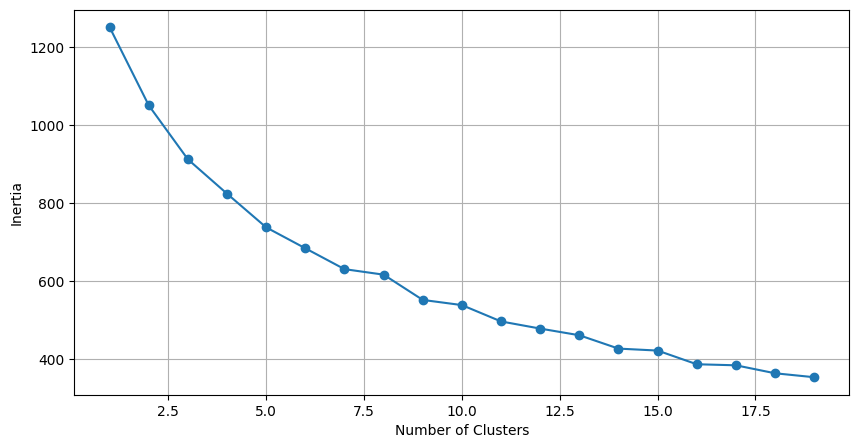

In [102]:
optimise_k_means(df_male_abo_numeric_scaled,20)

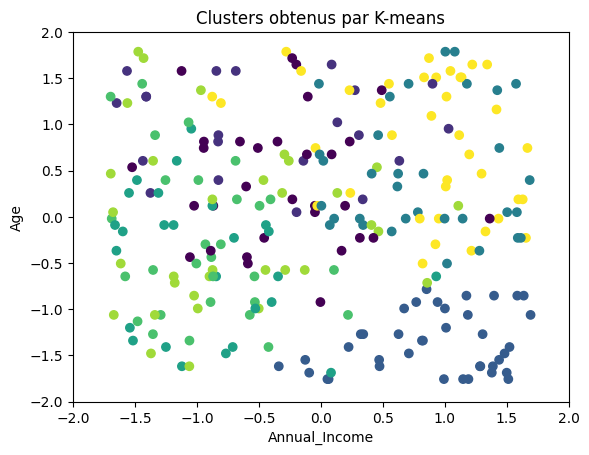

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 8
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(df_male_abo_numeric_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
df_male_abo_numeric['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(df_male_abo_numeric, pd.DataFrame):
    plt.scatter(df_male_abo_numeric_scaled.iloc[:, 1], df_male_abo_numeric_scaled.iloc[:, 0], c=labels)
else:
    plt.scatter(df_male_abo_numeric_scaled[:, 1], df_male_abo_numeric_scaled[:, 0], c=labels)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Clusters obtenus par K-means')
plt.xlabel('Annual_Income')
plt.ylabel('Age')
plt.show()

In [108]:
cluster_profile_male_abo =df_male_abo_numeric.groupby('Cluster').mean()
print(cluster_profile_male_abo)

               Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
Cluster                                                                       
0        48.645161   73179.451613       78.000000          6.129032  13.161290
1        57.190476   68045.047619       28.238095         15.285714   5.238095
2        23.641026  120159.923077       45.794872          6.717949  10.974359
3        50.060606  116663.575758       48.787879          4.787879   5.727273
4        36.269231   49558.153846       80.307692         14.769231   8.153846
5        39.172414   49803.689655       43.758621          3.551724   5.310345
6        41.727273   58108.939394       19.121212         11.121212  15.515152
7        54.789474  116715.736842       53.684211         12.631579  14.736842


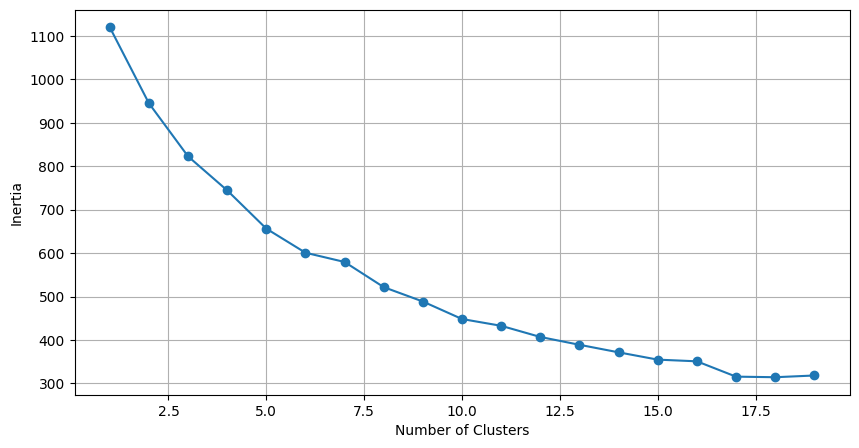

In [111]:
optimise_k_means(df_female_desabo_numeric_scaled,20)

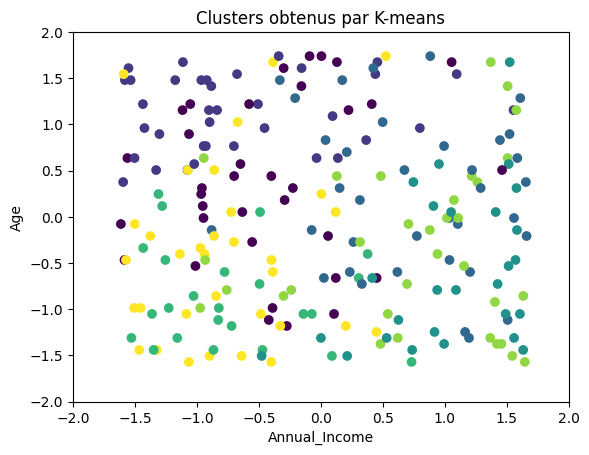

In [114]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 7
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(df_female_desabo_numeric_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
df_female_desabo_numeric['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(df_female_desabo_numeric, pd.DataFrame):
    plt.scatter(df_female_desabo_numeric_scaled.iloc[:, 1], df_female_desabo_numeric_scaled.iloc[:, 0], c=labels)
else:
    plt.scatter(df_female_desabo_numeric_scaled[:, 1], df_female_desabo_numeric_scaled[:, 0], c=labels)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Clusters obtenus par K-means')
plt.xlabel('Annual_Income')
plt.ylabel('Age')
plt.show()

In [ ]:
optimise_k_means(df_female_desabo_numeric_scaled,20)

In [115]:
cluster_profile_male_abo =df_male_abo_numeric.groupby('Cluster').mean()
print(cluster_profile_male_abo)

               Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
Cluster                                                                       
0        48.645161   73179.451613       78.000000          6.129032  13.161290
1        57.190476   68045.047619       28.238095         15.285714   5.238095
2        23.641026  120159.923077       45.794872          6.717949  10.974359
3        50.060606  116663.575758       48.787879          4.787879   5.727273
4        36.269231   49558.153846       80.307692         14.769231   8.153846
5        39.172414   49803.689655       43.758621          3.551724   5.310345
6        41.727273   58108.939394       19.121212         11.121212  15.515152
7        54.789474  116715.736842       53.684211         12.631579  14.736842


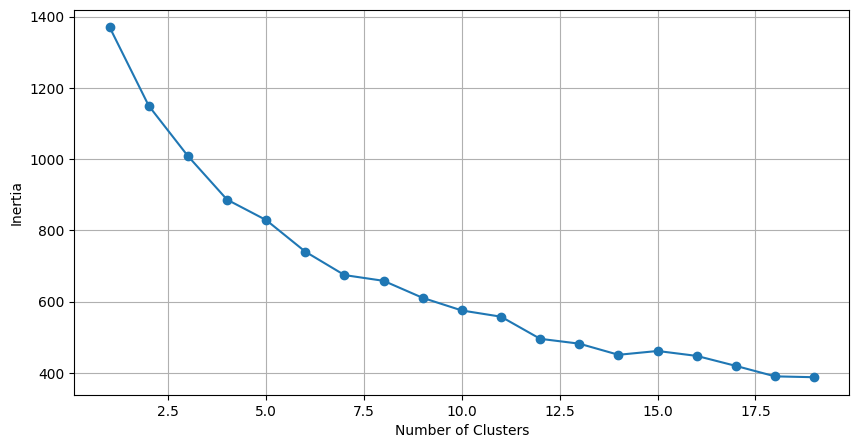

In [116]:
optimise_k_means(df_male_desabo_numeric_scaled,20)

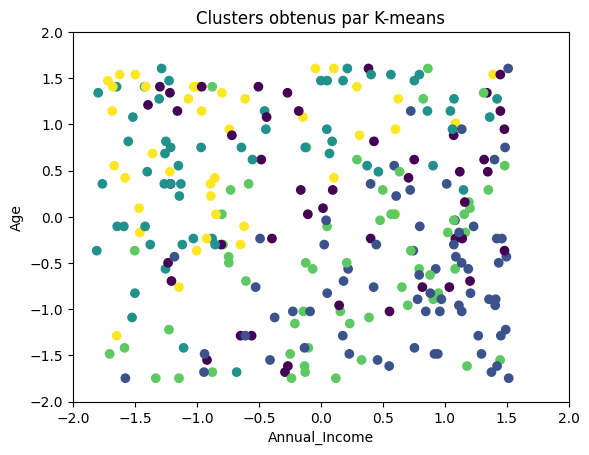

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 5
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(df_male_desabo_numeric_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
df_male_desabo_numeric['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(df_male_desabo_numeric, pd.DataFrame):
    plt.scatter(df_male_desabo_numeric_scaled.iloc[:, 1], df_male_desabo_numeric_scaled.iloc[:, 0], c=labels)
else:
    plt.scatter(df_male_desabo_numeric_scaled[:, 1], df_male_desabo_numeric_scaled[:, 0], c=labels)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Clusters obtenus par K-means')
plt.xlabel('Annual_Income')
plt.ylabel('Age')
plt.show()

In [120]:
cluster_profile_male_desabo =df_male_desabo_numeric.groupby('Cluster').mean()
print(cluster_profile_male_desabo)

               Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
Cluster                                                                       
0        48.042553   95209.553191       15.851064         14.340426  13.638298
1        34.347826  116779.318841       43.710145          5.550725   7.521739
2        53.864407   69083.983051       48.949153         10.966102   4.576271
3        36.983051   97050.355932       78.169492         13.881356  13.745763
4        55.675000   62277.400000       44.725000          4.625000  13.425000


In [ ]:
#Une conclusion que l'on peut avoir ici est de dire que le revenu annuelle divise la population en 2 grp, les personnes ayant un gros revenu et les autres plus petits

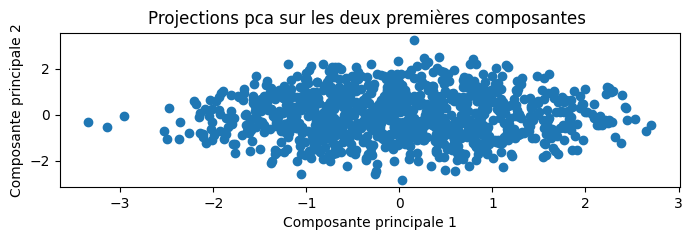

In [52]:
from sklearn.decomposition import PCA
n_components= 2
pca = PCA(n_components)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1' ,'PCA2'])
plt.figure(figsize=(8,2))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projections pca sur les deux premières composantes ')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Le coefficient de silhouette moyen est de : {silhouette_avg:.3f}")

Le coefficient de silhouette moyen est de : 0.151


In [ ]:
#Le coefficient est proche de 0, donc il y a 2 conclusion possible. Le klustering par K-Means n'est pas top 
#Ou bien les données sont trop homogènes et on ne distingue pas exactement les différences entre les personnes pour en faire des catégories distinct
#Voyons voir une autre méthode de klustering pour savoir si nous avons la même conclusion
# La prochaine méthode s'appelle DBSCAN 

[[ 0.81295917 -0.56070013 -1.50567323 ...  0.9530986  -1.00400803
  -0.41103535]
 [ 1.68057836  0.95020885  1.20842765 ...  0.9530986   0.99600797
  -0.41103535]
 [ 0.1455598   1.53626061  0.55566921 ...  0.9530986   0.99600797
  -0.41103535]
 ...
 [ 1.2133988  -0.29254765 -0.74984767 ... -1.04920939 -1.00400803
  -0.41103535]
 [-0.5885795  -0.49328355 -1.40260611 ...  0.9530986   0.99600797
  -0.41103535]
 [ 0.74621924 -0.98735854  1.17407194 ...  0.9530986   0.99600797
  -0.41103535]]


In [81]:
print(columns_numeric)

     Age  Annual_Income  Spending_Score  Online_Purchases  Seniority  Cluster
0     56          65648               5                 9          4       -1
1     69         123537              84                 0          8       -1
2     46         145991              65                12         13       -1
3     32          29516              30                16         13       -1
4     60         132863              21                 2         17       -1
..   ...            ...             ...               ...        ...      ...
995   60          92982               6                18         12       -1
996   64         122747              90                15          9       -1
997   62          75922              27                 3          1       -1
998   35          68231               8                 1         19       -1
999   55          49301              83                12         11       -1

[1000 rows x 6 columns]


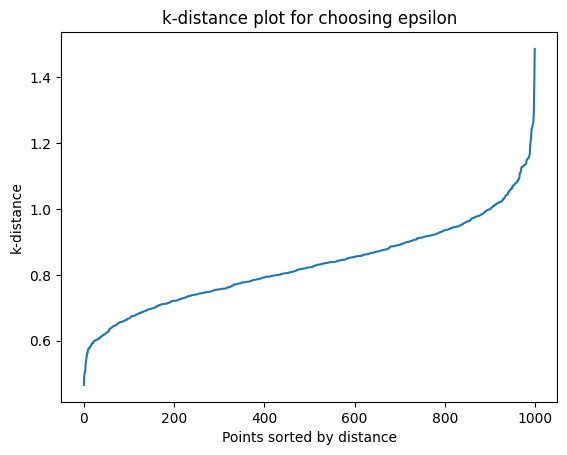

In [139]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Normaliser les données (si ce n'est pas déjà fait)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(columns_numeric)

# Choix de min_samples
min_samples = 4

# Calcul des distances vers les k-plus proches voisins
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Tracer le diagramme de coude pour choisir epsilon
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('k-distance plot for choosing epsilon')
plt.show()

C:\Users\KBH9801\AppData\Local\Temp\ipykernel_15712\297278662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_numeric['Cluster'] = label_DBSCAN


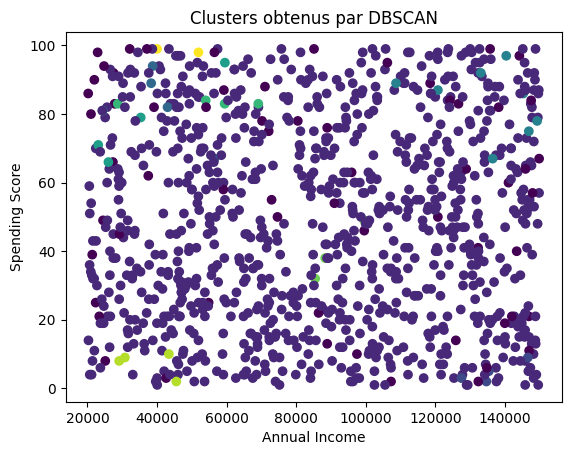

In [455]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=4)  # Ajuster eps et min_samples selon vos données
label_DBSCAN = dbscan.fit_predict(df_scaled)

# Ajout des étiquettes de clusters à notre DataFrame
columns_numeric['Cluster'] = label_DBSCAN

# Visualisation des clusters
plt.scatter(columns_numeric['Annual_Income'], columns_numeric['Spending_Score'], c=columns_numeric['Cluster'], cmap='viridis')
plt.title('Clusters obtenus par DBSCAN')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

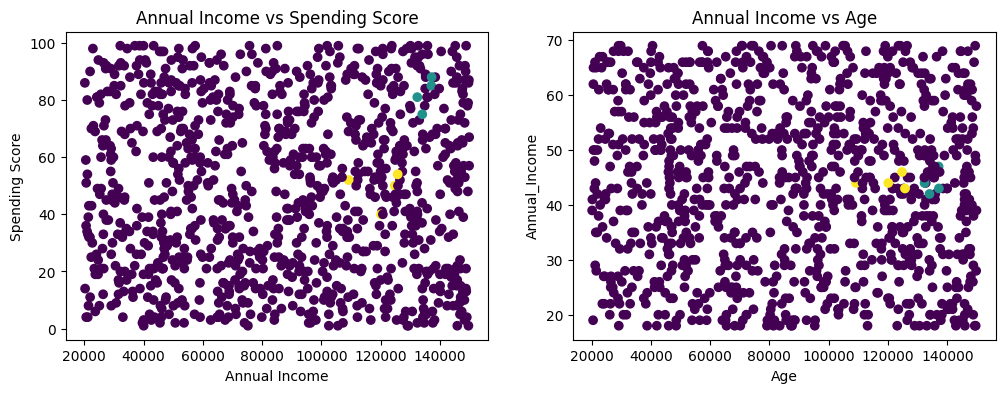

In [442]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(columns_numeric['Annual_Income'], columns_numeric['Spending_Score'], c=columns_numeric['Cluster'], cmap='viridis')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.subplot(1, 2, 2)
plt.scatter(columns_numeric['Annual_Income'], columns_numeric['Age'], c=columns_numeric['Cluster'], cmap='viridis')
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual_Income')


plt.show()

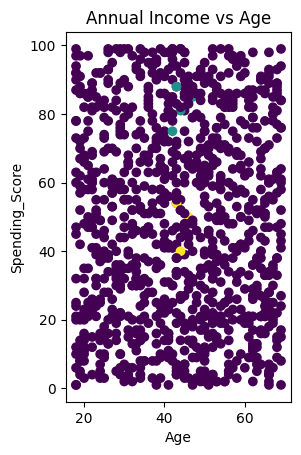

In [443]:
plt.subplot(1, 2, 2)
plt.scatter(columns_numeric['Age'], columns_numeric['Spending_Score'], c=columns_numeric['Cluster'], cmap='viridis')
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.show()

In [456]:
cluster_profile_DBSCAN =columns_numeric.groupby('Cluster').mean()
print(cluster_profile_DBSCAN)

               Age  Annual_Income  Spending_Score  Online_Purchases  Seniority
Cluster                                                                       
-1       42.238095   83487.714286       59.158730          8.857143   9.190476
 0       44.162791   87680.853821       47.626800          9.408638  10.397564
 1       46.750000  136046.750000        4.750000          8.250000  18.500000
 2       21.000000   44145.000000       83.000000         12.250000   7.000000
 3       20.125000  135102.750000       83.875000         18.125000  10.000000
 4       48.000000   33655.000000       78.400000         15.800000  15.200000
 5       50.000000   52814.000000       83.250000          2.000000   2.250000
 6       23.666667   91109.666667       39.666667         11.000000   1.333333
 7       62.250000   37199.750000        7.250000         18.750000  18.250000
 8       43.500000   45946.000000       98.500000         14.000000   1.000000


In [ ]:
#Conclusion
#Nous pouvons conclure que l'on a différents profiles à travers nos données. Grâce à toute l'analyse pour en faire des clusters, nous trouvons que nous pouvons distinguer 9 groupe de profiles.
#On as 

Index(['Age', 'Annual_Income', 'Spending_Score', 'Online_Purchases',
       'Seniority'],
      dtype='object')


In [253]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
print(df_encoded)


     CustomerID  Age  Annual_Income  Spending_Score  Online_Purchases  \
0             1   56          65648               5                 9   
1             2   69         123537              84                 0   
2             3   46         145991              65                12   
3             4   32          29516              30                16   
4             5   60         132863              21                 2   
..          ...  ...            ...             ...               ...   
995         996   60          92982               6                18   
996         997   64         122747              90                15   
997         998   62          75922              27                 3   
998         999   35          68231               8                 1   
999        1000   55          49301              83                12   

     Loyalty_Card  Seniority  Gender_Male  
0           False          4         True  
1            True          8       

In [263]:
#Ce code permet de rendre df dataframe et retirer Customer ID. De plus, on rajoute une colonne qui sache si homme ou femme
df_1 = pd.DataFrame(df_encoded)
df1_dropID = df_1.drop(columns = 'CustomerID') 
new_columns_gender = []
for cor in df1_dropID['Gender_Male'] : 
    if cor : 
        new_columns_gender.append(1)
    else : 
        new_columns_gender.append(0)
df1_dropID['Gender'] = new_columns_gender
print(df1_dropID)



     Age  Annual_Income  Spending_Score  Online_Purchases  Loyalty_Card  \
0     56          65648               5                 9         False   
1     69         123537              84                 0          True   
2     46         145991              65                12          True   
3     32          29516              30                16          True   
4     60         132863              21                 2         False   
..   ...            ...             ...               ...           ...   
995   60          92982               6                18         False   
996   64         122747              90                15         False   
997   62          75922              27                 3         False   
998   35          68231               8                 1          True   
999   55          49301              83                12          True   

     Seniority  Gender_Male  Gender  
0            4         True       1  
1            8         

In [264]:
new_columns_loyalty = []
for cor in df1_dropID['Loyalty_Card'] : 
    if cor : 
        new_columns_loyalty.append(1)
    else : 
        new_columns_loyalty.append(0)
df1_dropID['Loyalty'] = new_columns_loyalty
print(df1_dropID)

     Age  Annual_Income  Spending_Score  Online_Purchases  Loyalty_Card  \
0     56          65648               5                 9         False   
1     69         123537              84                 0          True   
2     46         145991              65                12          True   
3     32          29516              30                16          True   
4     60         132863              21                 2         False   
..   ...            ...             ...               ...           ...   
995   60          92982               6                18         False   
996   64         122747              90                15         False   
997   62          75922              27                 3         False   
998   35          68231               8                 1          True   
999   55          49301              83                12          True   

     Seniority  Gender_Male  Gender  Loyalty  
0            4         True       1        0  
1    

In [272]:
df1_drop = df1_dropID.drop(columns = 'Loyalty_Card')
df_1_final = df1_drop.drop(columns = 'Gender_Male')
print(df_1_final)

     Age  Annual_Income  Spending_Score  Online_Purchases  Seniority  Gender  \
0     56          65648               5                 9          4       1   
1     69         123537              84                 0          8       1   
2     46         145991              65                12         13       1   
3     32          29516              30                16         13       0   
4     60         132863              21                 2         17       1   
..   ...            ...             ...               ...        ...     ...   
995   60          92982               6                18         12       0   
996   64         122747              90                15          9       1   
997   62          75922              27                 3          1       0   
998   35          68231               8                 1         19       1   
999   55          49301              83                12         11       1   

     Loyalty  
0          0  
1        

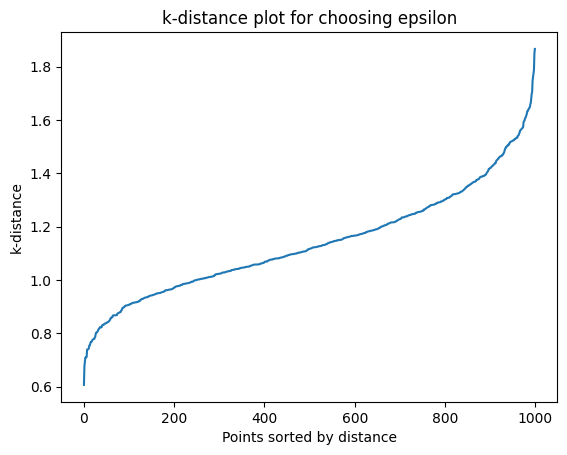

In [274]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Normaliser les données (si ce n'est pas déjà fait)
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_1_final)

# Choix de min_samples
min_samples = 4

# Calcul des distances vers les k-plus proches voisins
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_final_scaled)
distances, indices = neighbors_fit.kneighbors(df_final_scaled)

# Tracer le diagramme de coude pour choisir epsilon
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('k-distance plot for choosing epsilon')
plt.show()

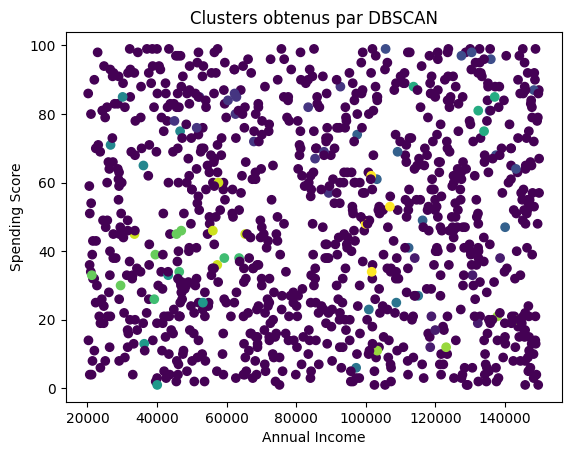

In [345]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=4)  # Ajuster eps et min_samples selon vos données
label_DBSCAN = dbscan.fit_predict(df_final_scaled)

# Ajout des étiquettes de clusters à notre DataFrame
df_1_final['Cluster'] = label_DBSCAN

# Visualisation des clusters
plt.scatter(df_1_final['Annual_Income'], df_1_final['Spending_Score'], c=df_1_final['Cluster'], cmap='viridis')
plt.title('Clusters obtenus par DBSCAN')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

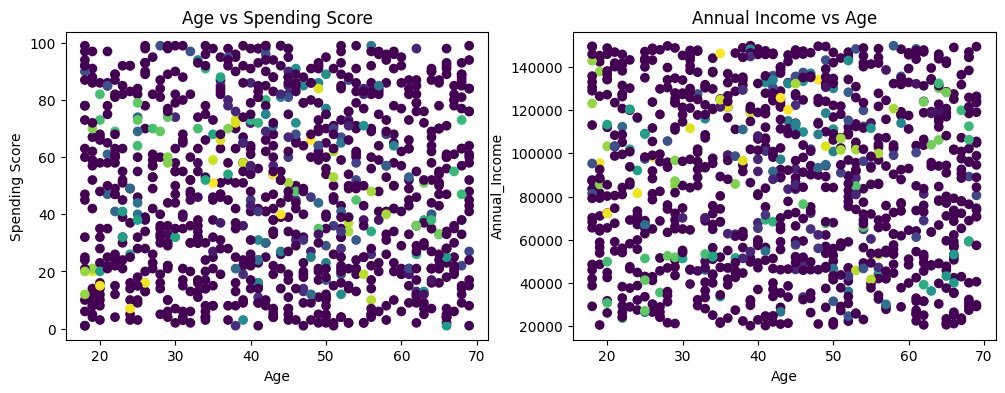

In [279]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df_1_final['Age'], df_1_final['Spending_Score'], c=df_1_final['Cluster'], cmap='viridis')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.subplot(1, 2, 2)
plt.scatter(df_1_final['Age'], df_1_final['Annual_Income'], c=df_1_final['Cluster'], cmap='viridis')
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual_Income')


plt.show()

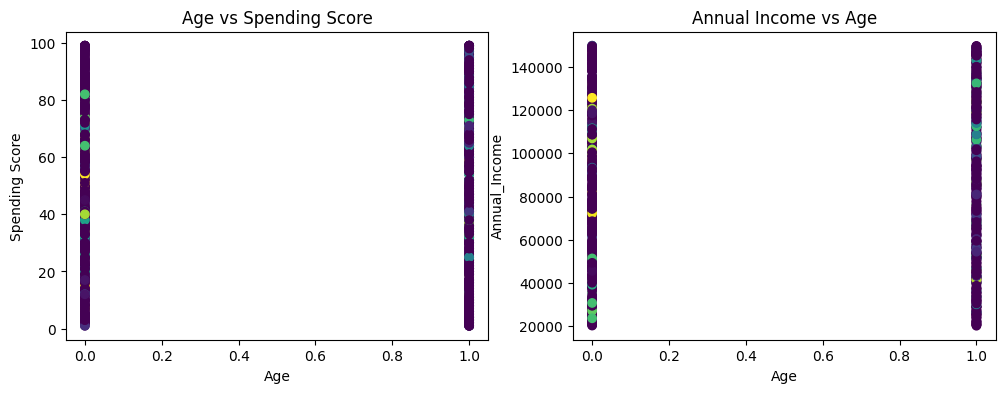

In [280]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df_1_final['Gender'], df_1_final['Spending_Score'], c=df_1_final['Cluster'], cmap='viridis')
plt.title('Age vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

plt.subplot(1, 2, 2)
plt.scatter(df_1_final['Gender'], df_1_final['Annual_Income'], c=df_1_final['Cluster'], cmap='viridis')
plt.title('Annual Income vs Age')
plt.xlabel('Gender')
plt.ylabel('Annual_Income')


plt.show()

In [347]:
cluster_profile_DBSCAN =df_1_final.groupby('Cluster').mean()
print(cluster_profile_DBSCAN)

               Age  Annual_Income  Spending_Score  Online_Purchases  \
Cluster                                                               
-1       43.781250   87049.104526       48.500000          9.549569   
 0       59.000000  124713.571429       25.428571         16.142857   
 1       42.692308   69494.000000       77.615385          4.307692   
 2       42.125000  133024.250000       86.250000         15.750000   
 3       23.000000  113103.166667       56.833333          0.833333   
 4       46.250000  105497.750000       20.250000          0.750000   
 5       50.500000   34864.000000       74.000000         13.500000   
 6       65.000000   43182.000000       18.000000         15.000000   
 7       44.500000  129293.000000       82.250000          5.750000   
 8       62.250000   52128.000000       34.000000          8.750000   
 9       31.400000   36562.600000       38.600000         15.600000   
 10      18.750000  126789.500000       16.000000          1.750000   
 11   

In [ ]:
#Conclusion et interpretation

In [326]:
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_1_final)

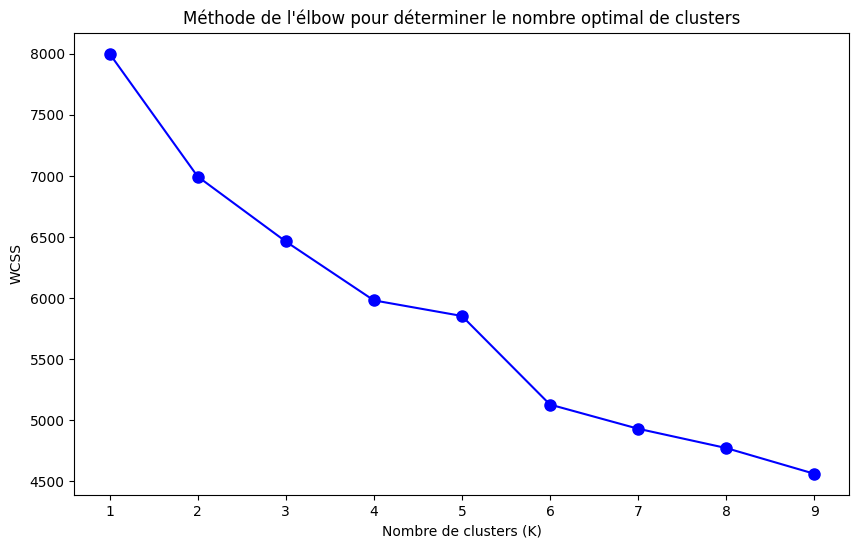

In [337]:
#Avant de pouvoir utiliser la méthode des clusters K-means, nous avons besoin de savoir à l'avance le nombre de clusters que l'on va appliquer
#Pour cela, nous utilisons la méthode ELbow
#On prend le K qui permet d'avoir le coude (la courbe en bas à gauche)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que df_scaled est le DataFrame normalisé

# Liste pour stocker les WCSS pour chaque valeur de K
wcss = []

# Calcul de WCSS pour différentes valeurs de K
K_values = range(1, 10)
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_final_scaled)
    wcss.append(kmeans.inertia_)

# Tracer le graphe de l'élbow
plt.figure(figsize=(10, 6))
plt.plot(K_values, wcss, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('WCSS')
plt.title('Méthode de l\'élbow pour déterminer le nombre optimal de clusters')
plt.show()

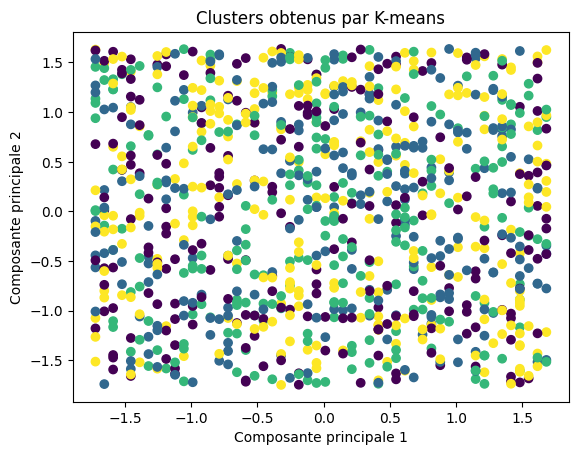

In [343]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Au vu du schéma, cela partirait pour K = 2, mais on essaye K = 4
K = 5
n_clusters = K

# Initialisation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquer K-means sur les données normalisées
labels = kmeans.fit_predict(df_final_scaled)
# Ajouter les labels de clusters aux colonnes numériques si nécessaire
df_1_final['Cluster'] = labels


# Visualisation des clusters (si les données sont en 2D)
if isinstance(df_final_scaled, pd.DataFrame):
    plt.scatter(df_final_scaled.iloc[:, 0], df_final_scaled.iloc[:, 1], c=labels, cmap='viridis')
else:
    plt.scatter(df_final_scaled[:, 0], df_final_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Clusters obtenus par K-means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

In [344]:
cluster_profile_Kmeans =df_1_final.groupby('Cluster').mean()
print(cluster_profile_Kmeans)

               Age  Annual_Income  Spending_Score  Online_Purchases  \
Cluster                                                               
0        42.205357   84156.209821       49.941964          9.343750   
1        44.956349   87836.452381       48.230159          9.674603   
2        43.284000   85277.024000       49.740000          9.060000   
3        44.580292   90604.540146       47.627737          9.883212   

         Seniority  Gender  Loyalty  
Cluster                              
0        10.165179     0.0      0.0  
1        10.658730     0.0      1.0  
2        10.292000     1.0      1.0  
3        10.138686     1.0      0.0  


In [340]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_final_scaled, labels)
print(f"Le coefficient de silhouette moyen est de : {silhouette_avg:.3f}")

Le coefficient de silhouette moyen est de : 0.117
